In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org=(50, 300), fontFace=font, fontScale=5, color=(255, 255, 255), thickness=25, lineType=cv2.LINE_AA)
    return blank_img

def display_img(img):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

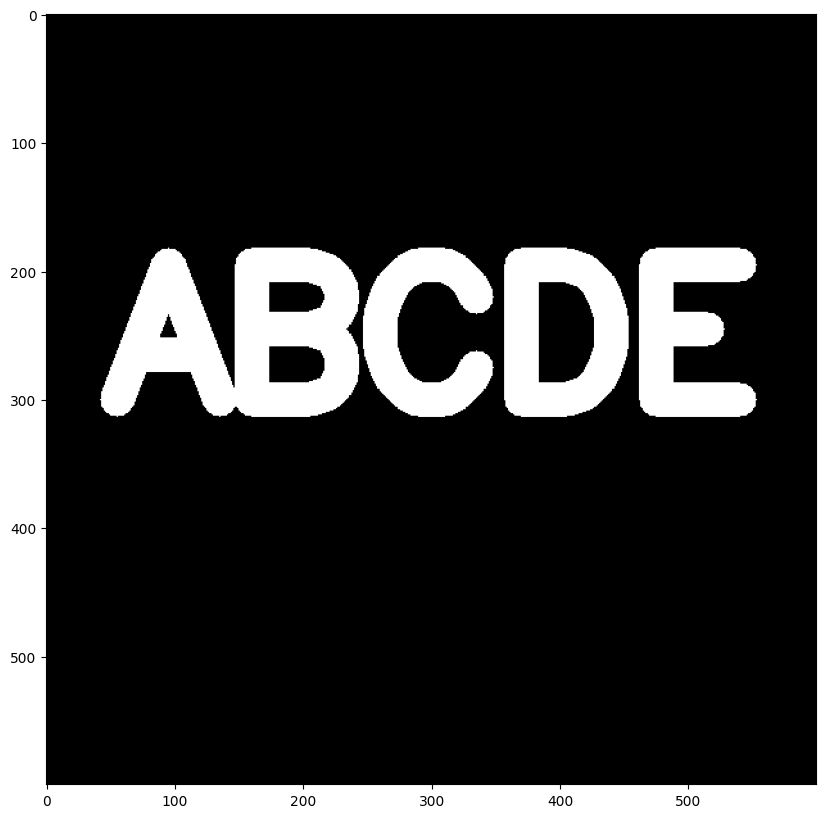

In [7]:
img = load_img()
display_img(img)

In [8]:
kernel = np.ones((5, 5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [9]:
result = cv2.erode(img, kernel, iterations=4)

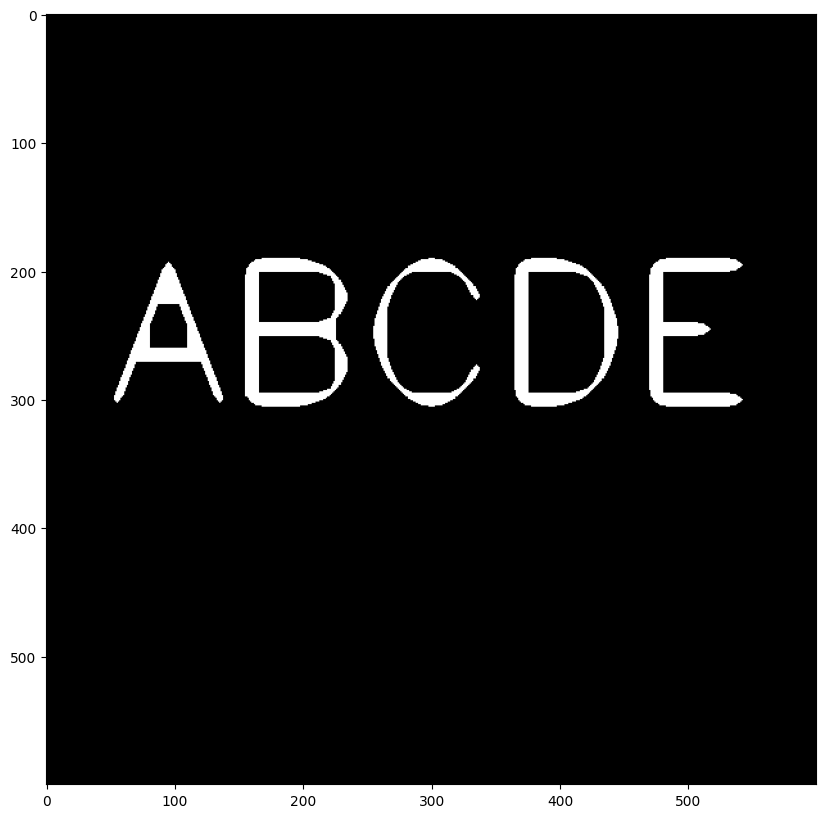

In [10]:
display_img(result)

In [23]:
img = load_img()
white_noise = np.random.randint(low=0, high=2, size=(600, 600))
white_noise

array([[0, 0, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 0, 1]])

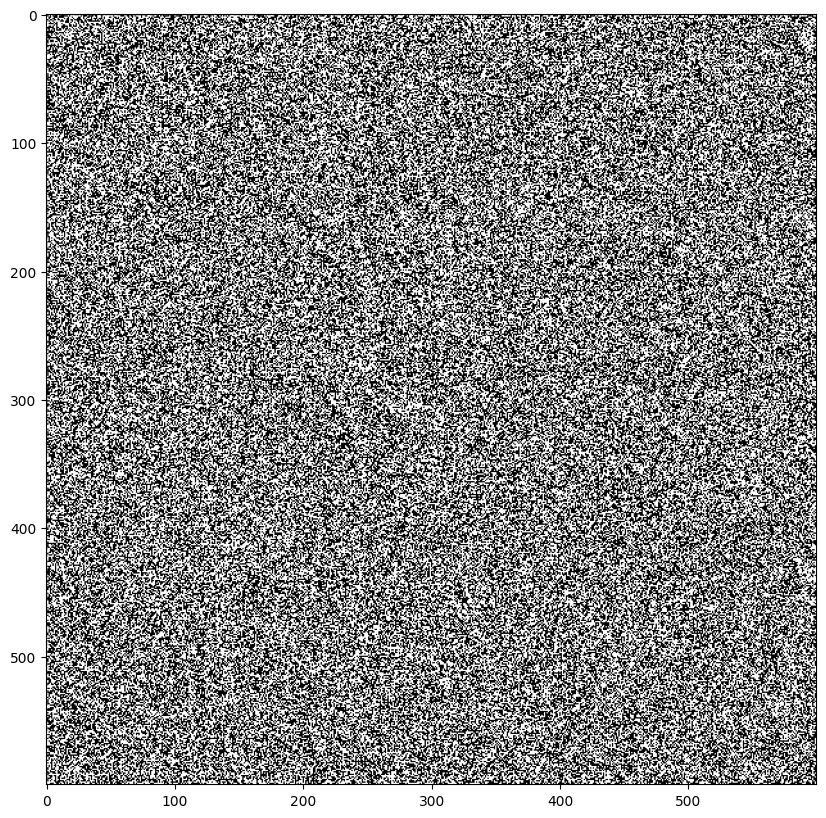

In [24]:
white_noise = white_noise * 255
display_img(white_noise)

In [25]:
noise_img = white_noise + img
noise_img

array([[  0.,   0., 255., ...,   0., 255.,   0.],
       [255.,   0., 255., ...,   0., 255., 255.],
       [255., 255.,   0., ...,   0.,   0.,   0.],
       ...,
       [255.,   0., 255., ...,   0., 255.,   0.],
       [255., 255., 255., ...,   0.,   0., 255.],
       [  0., 255., 255., ...,   0.,   0., 255.]])

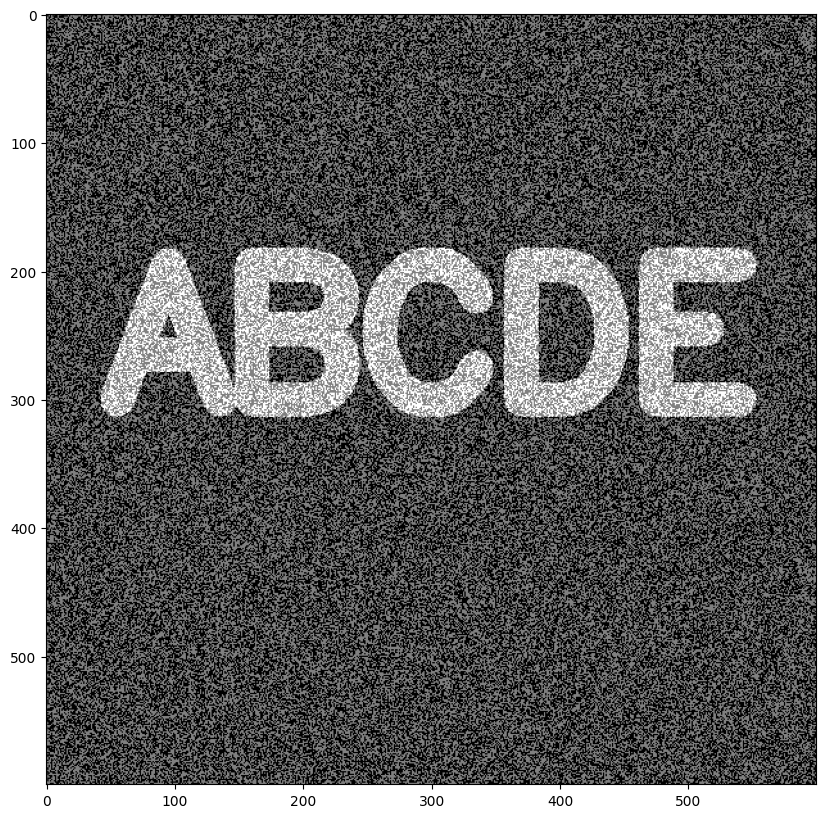

In [26]:
display_img(noise_img)

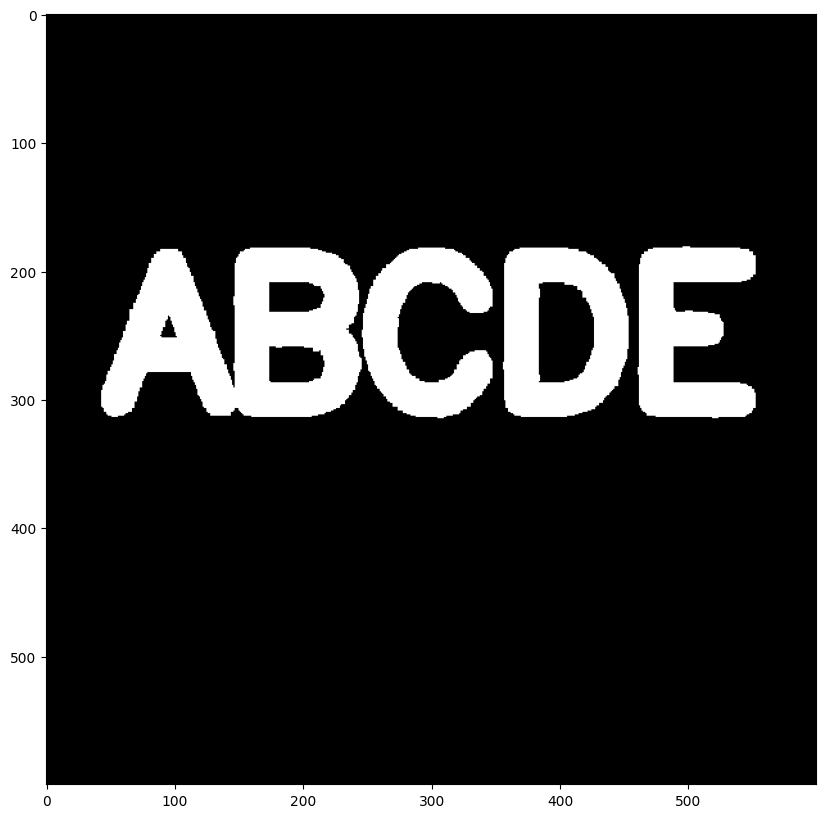

In [27]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

In [30]:
img = load_img()
black_noise = np.random.randint(low=0, high=2, size=(600, 600))
black_noise = black_noise * -255
black_noise

array([[   0, -255, -255, ..., -255,    0,    0],
       [-255, -255, -255, ..., -255, -255, -255],
       [-255, -255, -255, ..., -255, -255, -255],
       ...,
       [   0, -255, -255, ..., -255, -255,    0],
       [-255,    0,    0, ..., -255, -255,    0],
       [-255,    0,    0, ...,    0, -255,    0]])

In [31]:
black_noise_img = img + black_noise
black_noise_img

array([[   0., -255., -255., ..., -255.,    0.,    0.],
       [-255., -255., -255., ..., -255., -255., -255.],
       [-255., -255., -255., ..., -255., -255., -255.],
       ...,
       [   0., -255., -255., ..., -255., -255.,    0.],
       [-255.,    0.,    0., ..., -255., -255.,    0.],
       [-255.,    0.,    0., ...,    0., -255.,    0.]])

In [32]:
black_noise_img[black_noise_img == -255] = 0

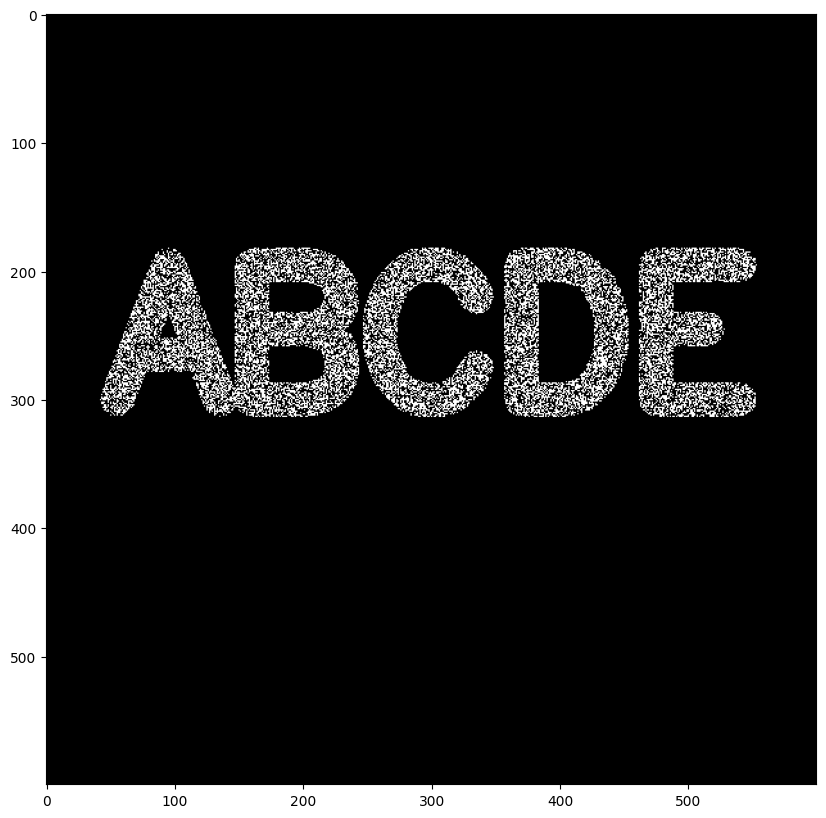

In [33]:
display_img(black_noise_img)

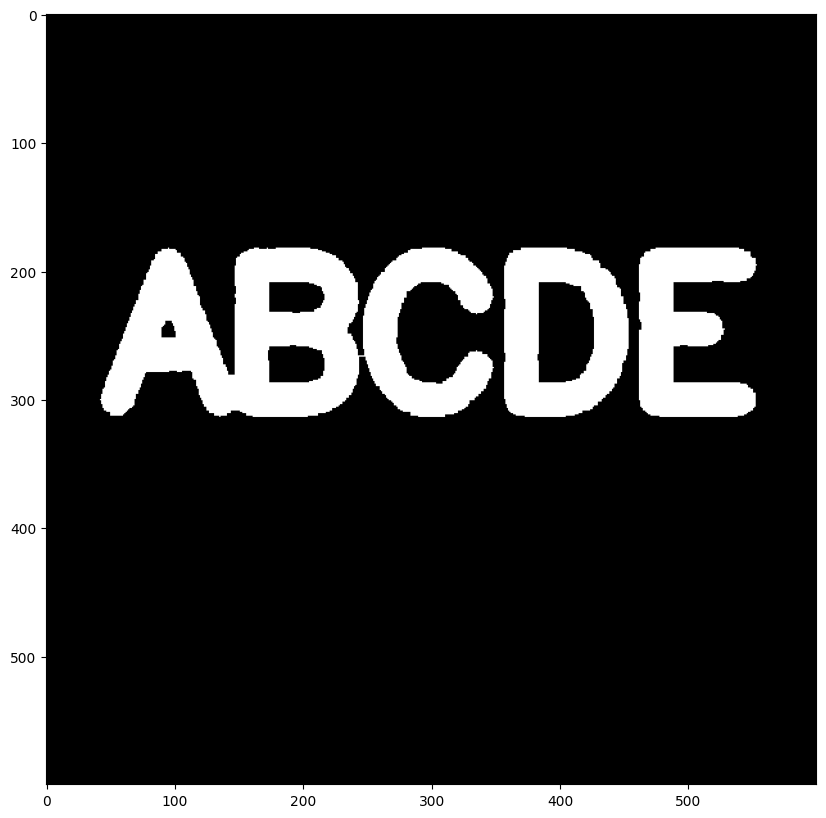

In [34]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

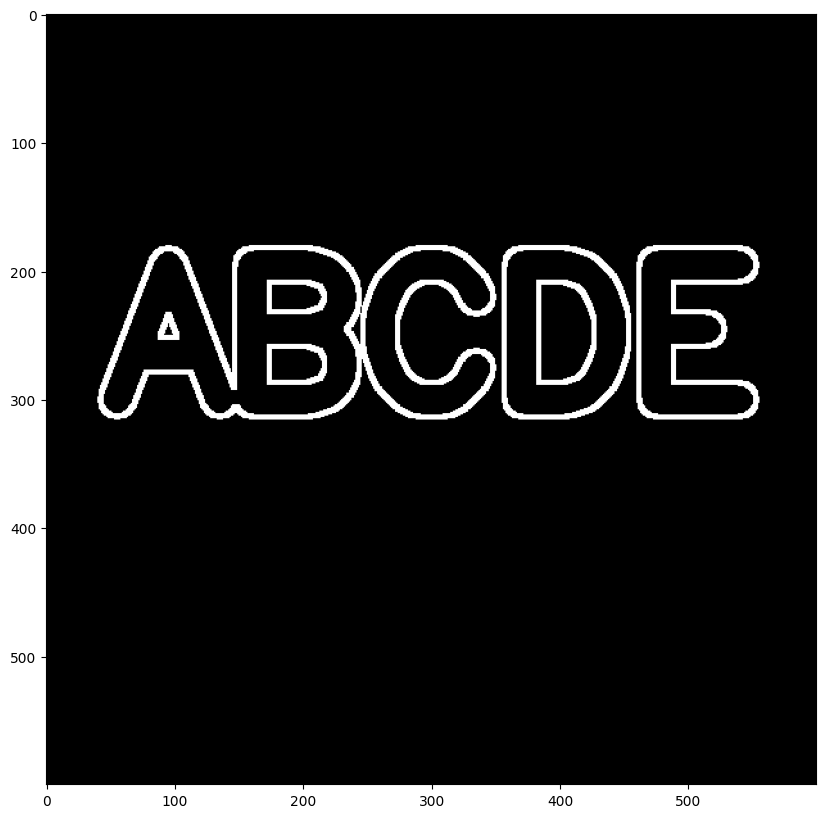

In [35]:
img = load_img()
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)